In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data = pd.read_csv("metals_train_original.csv")
print("data shape: ", data.shape)
data.head()

data shape:  (2634, 558)


,metals_daily_train.csv,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701.0,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008.0,20080630.0
1,20080702.0,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008.0,20080630.0
2,20080703.0,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008.0,20080630.0
3,20080704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008.0,20080630.0
4,20080707.0,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009.0,20080707.0


In [86]:
data.isna().sum()

metals_daily_train.csv      1
p0                        274
p1                        274
p2                        274
f000_open                 145
f000_high                 145
f000_low                  145
f000_settle               145
f001_open                 145
f001_high                 145
f001_low                  145
f001_settle               145
f002_open                 143
f002_high                 143
f002_low                  143
f002_settle               143
f003_open                 150
f003_high                 150
f003_low                  150
f003_settle               150
f004_open                 150
f004_high                 150
f004_low                  150
f004_settle               150
f005_open                 145
f005_high                 145
f005_low                  145
f005_settle               145
f006_open                 145
f006_high                 145
                         ... 
f131_open                 229
f131_high                 229
f131_low  

In [87]:
def float2date(x):
    x = float(x)
    date = str(x).split(".")[0]
    assert(len(date) == 8)
    
    year = int(date[0:4])
    month = int(date[4:6])
    day = int(date[6:8])
    return pd.datetime(year, month, day)

In [65]:
df = data.dropna()
df["metals_daily_train.csv"] = df["metals_daily_train.csv"].map(float2date)
df["week_date"] = df["week_date"].map(float2date)
df = df.rename(index=str, columns={"metals_daily_train.csv": "date"})
df = df.set_index("date")
df.head()

c:\users\louis\documents\python_virtual_env\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\louis\documents\python_virtual_env\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,444.511058,457.032497,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,48.62,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030.0,2008-12-01
2008-12-02,446.908899,465.530103,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,51.04,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030.0,2008-12-01
2008-12-03,453.484820,482.060575,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,51.21,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030.0,2008-12-01
2008-12-04,447.532919,472.395859,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,51.60,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030.0,2008-12-01
2008-12-05,447.084228,471.922241,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,53.45,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030.0,2008-12-01


In [110]:
def get_week_data(df, week_date):
    return df[df["week_date"] == week_date]


def get_n_next_weeks(weeks, week_index, n):
    if week_index + n >= len(weeks):
        return None
    for i in range(1, n + 1):
        if  weeks[week_index + i] - weeks[week_index] != np.timedelta64(7 * i, 'D'):
            return None
    
    return [weeks[week_index + i] for i in range(1, n + 1)]


def get_n_previous_weeks(weeks, week_index, n):
    if week_index - n < 0:
        return None
    for i in range(1, n + 1):
        if  weeks[week_index] - weeks[week_index - i] != np.timedelta64(7 * i, 'D'):
            return None
    
    return [weeks[week_index - i] for i in range(1, n + 1)]


def pre_process_data_rnn(df, N_previous_weeks):
    features, list_labels = [], [[] for _ in range(10)]
    weeks = pd.unique(df["week_date"])
    for week_index in range(len(weeks)):
        week = weeks[week_index]
        future_weeks = get_n_next_weeks(weeks, week_index, 10)
        previous_weeks = get_n_previous_weeks(weeks, week_index, N_previous_weeks)
        
        # If any data is None, skip the example
        if future_weeks is None or previous_weeks is None:
            continue
        
        # If we managed to get here, we found the 10 next weeks and the N_previous_weeks previous weeks
        present_and_past_weeks = [week] + previous_weeks
        present_and_past_week_data = []
        for week in present_and_past_weeks:
            week_data = get_week_data(df, week)
            if len(week_data) != 5:
                break
            present_and_past_week_data.append(week_data.drop(columns = ["p0", "p1", "p2", "week_date"]).values)
        else:
            # If we managed to get here, then it means we have no data missing, so we can create
            # a new input in our dataframe
            ex_features = np.concatenate(present_and_past_week_data)\
                .reshape(((N_previous_weeks+1) * 5, len(df.columns) - 4))

            future_weeks_data = [get_week_data(df, future_week) for future_week in future_weeks]
            list_ex_labels = [np.mean(future_week_data["p0"]) for future_week_data in future_weeks_data]

            features.append(ex_features)
            for index, ex_label in enumerate(list_ex_labels):
                if pd.isna(ex_label):
                    print(list_future_weeks_data)
                list_labels[index].append(ex_label)
            
    return np.array(features, dtype=np.float32),\
           np.transpose(np.array([np.array(labels) for labels in list_labels], dtype=np.float32))


In [111]:
raw_features, list_labels = pre_process_data_rnn(df, 0)
print(np.shape(raw_features))
print(np.shape(list_labels))

(220, 5, 553)
(220, 10)


In [148]:
# define RNN 
import tensorflow as tf
from tensorflow.contrib.rnn import LSTMBlockCell


n_features = 100 # number of features selected from the PCA
def model_rnn(N_previous_weeks, num_units):
    # define placeholders
    features_ph = tf.placeholder(dtype=tf.float32, shape=(None, (N_previous_weeks + 1) * 5, n_features))
    labels_ph = tf.placeholder(dtype=tf.float32, shape=(None, 10))
    dropout_ph = tf.placeholder(dtype=tf.float32, shape=())
    global_step = tf.get_variable("global_step", shape=(), initializer=tf.initializers.zeros, trainable=False)
    
    # define model
    # 'inputs' is a tensor of shape [batch_size, max_time, cell_state_size]
    lstm_cell = LSTMBlockCell(num_units, use_peephole=True)
    
    # defining initial state
    initial_state = lstm_cell.zero_state(tf.shape(labels_ph)[0], dtype=tf.float32)
    
    # initial droupout
    do_features = tf.layers.dropout(features_ph, dropout_ph)
    
    # 'state' is a tensor of shape [batch_size, cell_state_size]
    outputs, state = tf.nn.dynamic_rnn(lstm_cell, do_features,
                                       initial_state=initial_state,
                                       dtype=tf.float32)
    
    # dense layers
    dense_input = tf.layers.dropout(state[1], dropout_ph)
    #dense_layer = tf.layers.dense(dense_input, num_units, activation=tf.nn.leaky_relu)
    dense_layer = tf.layers.dense(dense_input, num_units, activation=tf.nn.tanh)
    dense_layer = tf.layers.dropout(dense_layer, dropout_ph)
    
    #dense_layer = tf.layers.dense(dense_layer, num_units, activation=tf.nn.leaky_relu)
    dense_layer = tf.layers.dense(dense_layer, num_units, activation=tf.nn.tanh)
    dense_layer = tf.layers.dropout(dense_layer, dropout_ph)
    
    predictions = tf.layers.dense(dense_layer, 10, activation=None, use_bias=False)
    
    # compute loss and accuracy
    loss = tf.losses.mean_squared_error(labels_ph, predictions)
    loss_summary = tf.summary.scalar("RMSE", tf.sqrt(loss))
    
    # train operator
    train = tf.train.AdamOptimizer().minimize(loss, global_step=global_step)
    
    return features_ph, labels_ph, dropout_ph, predictions, loss, train, global_step, loss_summary


tf.reset_default_graph()
features_ph, labels_ph, dropout_ph, predictions, loss, train, global_step, loss_summary = model_rnn(0, 300)

In [149]:
from sklearn.decomposition import PCA

# Create train and test data
indices = np.linspace(0, len(raw_features)-2, len(raw_features), dtype=int)
np.random.shuffle(indices)
X_train, X_test = raw_features[indices[:int(len(raw_features)*0.8)]],\
                  raw_features[indices[int(len(raw_features)*0.8):]]
list_y_train, list_y_test = list_labels[indices[:int(len(raw_features)*0.8)]],\
                            list_labels[indices[int(len(raw_features)*0.8):]]

# Fit PCA on train and apply it to train and test
X_train_shape = np.shape(X_train)
X_test_shape = np.shape(X_test)
pca = PCA(n_components=n_features)
pca.fit(np.reshape(X_train, (X_train_shape[0] * X_train_shape[1],  X_train_shape[2])))
        
X_train_PCA = pca.transform(np.reshape(X_train, (X_train_shape[0] * X_train_shape[1], X_train_shape[2])))
X_train_PCA = np.reshape(X_train_PCA, (X_train_shape[0], X_train_shape[1], n_features))
X_test_PCA = pca.transform(np.reshape(X_test, (X_test_shape[0] * X_test_shape[1], X_test_shape[2])))
X_test_PCA = np.reshape(X_test_PCA, (X_test_shape[0], X_test_shape[1], n_features))                      

In [150]:
dataset = tf.data.Dataset.from_tensor_slices((X_train_PCA, list_y_train))
dataset = dataset.shuffle(buffer_size=10000, reshuffle_each_iteration=True)
dataset = dataset.repeat()
dataset = dataset.batch(32)
iterator = dataset.make_one_shot_iterator()

In [163]:
# You can re-run this cell as many times as you want, or stop it at any time as you want,
# the model is automatically saved every 10 steps.
# Too see the evolution of the RMSE and the graph of the model, run the command:
# tensorboard --logdir model/tensorboard
saver = tf.train.Saver()
model_path = os.path.join(os.getcwd(), "model")
save_path = os.path.join(model_path, "model.ckpt")


with tf.Session() as sess:
    # Initialize writers that will write in the tensorboard folder
    train_writer = tf.summary.FileWriter(model_path + '\\tensorboard\\train',
                                     sess.graph)
    test_writer = tf.summary.FileWriter(model_path + '\\tensorboard\\test',
                                       sess.graph)

    # Initialize variables
    sess.run(tf.global_variables_initializer())

    # Restore model if it exists
    try:
        saver.restore(sess, save_path)
    except ValueError:
        print("No model found, creating new one")

    # train
    features, labels = iterator.get_next()
    for i in range(5000000):
        x, y = sess.run([features, labels])
        sess.run(train, feed_dict={features_ph: x,
                                   labels_ph: y,
                                   dropout_ph: 0.0})
        if i % 10 == 9:
            loss_train, train_summary = sess.run([loss, loss_summary],
                                                 feed_dict={features_ph: x,
                                                            labels_ph: y,
                                                            dropout_ph: 0.0})
            loss_test, test_summary = sess.run([loss, loss_summary],
                                               feed_dict={features_ph: X_test_PCA,
                                                          labels_ph: list_y_test,
                                                          dropout_ph: 0.0})

            # write summaries 
            train_writer.add_summary(train_summary, sess.run(global_step))
            test_writer.add_summary(test_summary, sess.run(global_step))

            # save model
            saver.save(sess, save_path)


INFO:tensorflow:Restoring parameters from C:\Users\louis\Documents\3A_berkeley\fall_semester\DATA_X\deepvu_project\model\model.ckpt


KeyboardInterrupt: 

<h2> Visualization </h2>

In [152]:
x, y = raw_features[-1], list_labels[-1]
x_pca = pca.transform(x)
x_pca = np.reshape(x_pca, (1, 5, n_features))

INFO:tensorflow:Restoring parameters from C:\Users\louis\Documents\3A_berkeley\fall_semester\DATA_X\deepvu_project\model\model.ckpt


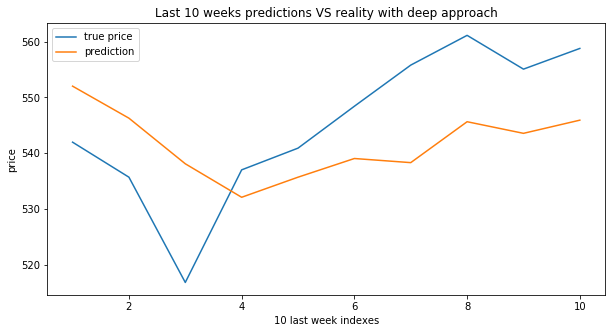

In [153]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    y_hat = sess.run(predictions, feed_dict={features_ph: x_pca, labels_ph: [[0]*10]})[0]

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(y) + 1), y, label="true price")
plt.plot(np.arange(1, len(y) + 1), y_hat, label="prediction")
plt.title("Last 10 weeks predictions VS reality with deep approach")
plt.ylabel("price")
plt.xlabel("10 last week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\deep_approach.png")

In [154]:
def get_all_weekly_data(df):
    p0_means = []
    weeks = pd.unique(df["week_date"])
    for week in weeks:
        week_data = get_week_data(df, week)
        p0_means.append(np.mean(week_data["p0"]))
    return p0_means
        
week_datas = get_all_weekly_data(df)

INFO:tensorflow:Restoring parameters from C:\Users\louis\Documents\3A_berkeley\fall_semester\DATA_X\deepvu_project\model\model.ckpt


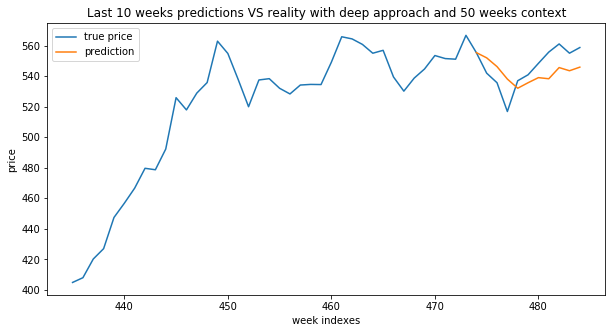

In [162]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    y_hat = sess.run(predictions, feed_dict={features_ph: x_pca, labels_ph: [[0]*10]})[0]

indices = np.arange(0, len(week_datas))


plt.figure(figsize=(10,5))
plt.plot(indices[-50:], week_datas[-50:], label="true price")
plt.plot(indices[-11:], [week_datas[-11]] + list(y_hat), label="prediction")
plt.title("Last 10 weeks predictions VS reality with deep approach and 50 weeks context")
plt.ylabel("price")
plt.xlabel("week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\50_deep_approach.png")